In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [64]:
# Load the CSV file
file_path = 'recipes_data.csv'  # replace with your file path
df = pd.read_csv(file_path, nrows=10000)

# Display the column names and first 5 rows
print("Column Names:")
print(df.columns)

print("\nFirst 5 Rows:")
print(df.head())

Column Names:
Index(['title', 'ingredients', 'directions', 'link', 'source', 'NER', 'site'], dtype='object')

First 5 Rows:
                   title                                        ingredients  \
0    No-Bake Nut Cookies  ["1 c. firmly packed brown sugar", "1/2 c. eva...   
1  Jewell Ball'S Chicken  ["1 small jar chipped beef, cut up", "4 boned ...   
2            Creamy Corn  ["2 (16 oz.) pkg. frozen corn", "1 (8 oz.) pkg...   
3          Chicken Funny  ["1 large whole chicken", "2 (10 1/2 oz.) cans...   
4   Reeses Cups(Candy)    ["1 c. peanut butter", "3/4 c. graham cracker ...   

                                          directions  \
0  ["In a heavy 2-quart saucepan, mix brown sugar...   
1  ["Place chipped beef on bottom of baking dish....   
2  ["In a slow cooker, combine all ingredients. C...   
3  ["Boil and debone chicken.", "Put bite size pi...   
4  ["Combine first four ingredients and press in ...   

                                              link    source  \


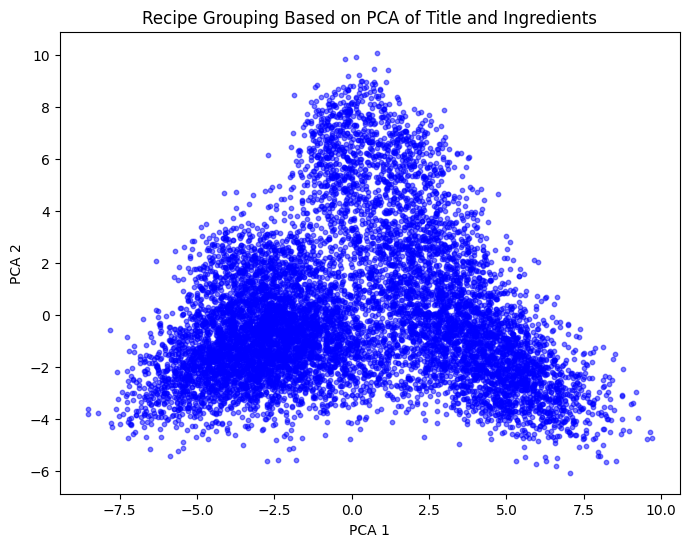

In [65]:
# Combine title and ingredients into a single text field for analysis
df['text'] = df['title'] + " " + df['ingredients'] + " " + df["directions"]

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the 'text' column into TF-IDF features
tfidf_matrix = vectorizer.fit_transform(df['text'])

# Standardize the TF-IDF matrix
scaler = StandardScaler(with_mean=False)  # With mean=False to handle sparse matrix
tfidf_matrix_scaled = scaler.fit_transform(tfidf_matrix.toarray())

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(tfidf_matrix_scaled)

# Create a new DataFrame with PCA results
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Plot the PCA result to visualize the grouping
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c='blue', alpha=0.5, s=10)
plt.title('Recipe Grouping Based on PCA of Title and Ingredients')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Setting the number of clusters to 2.
You can see that most savoury dishes are lebelled 1 and desserts labelled as 0.


Clustered Recipes (first 20 rows):
                               title  cluster
0                No-Bake Nut Cookies        0
1              Jewell Ball'S Chicken        1
2                        Creamy Corn        1
3                      Chicken Funny        1
4               Reeses Cups(Candy)          0
5           Cheeseburger Potato Soup        1
6                Rhubarb Coffee Cake        0
7                     Scalloped Corn        1
8               Nolan'S Pepper Steak        1
9                    Millionaire Pie        0
10             Double Cherry Delight        0
11                     Buckeye Candy        0
12              Quick Barbecue Wings        1
13               Taco Salad Chip Dip        1
14      Pink Stuff(Frozen Dessert)          0
15              Fresh Strawberry Pie        0
16        Easy German Chocolate Cake        0
17                    Broccoli Salad        1
18               Strawberry Whatever        0
19  Eggless Milkless Applesauce Cake        

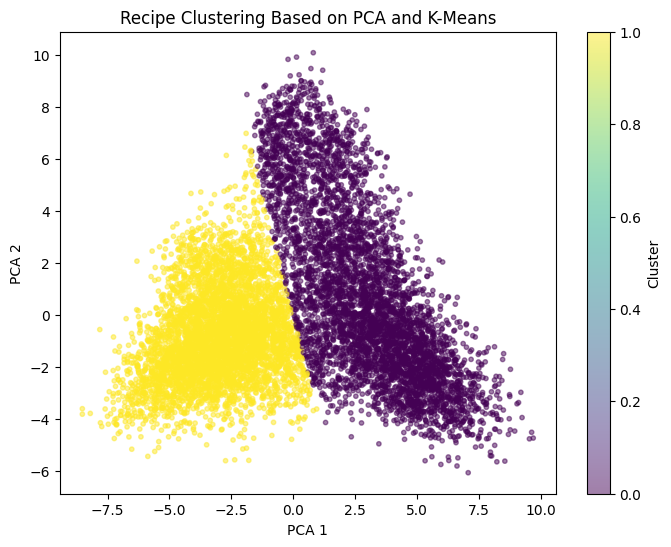

In [66]:
# Apply K-Means clustering to the PCA result
kmeans = KMeans(n_clusters=2, random_state=42)  # Setting n_clusters to 9 based on your observation
df['cluster'] = kmeans.fit_predict(pca_result)

# Display the first 5 rows with cluster labels
print("\nClustered Recipes (first 20 rows):")
print(df[['title', 'cluster']].head(20))

# Visualize the clusters in the PCA space
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df['cluster'], cmap='viridis', alpha=0.5, s=10)
plt.title('Recipe Clustering Based on PCA and K-Means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [67]:
# Filter and display all recipes from a particular cluster (e.g., cluster 0)
cluster_to_view = 0  # Change this to any cluster number you want to see
recipes_in_cluster = df[df['cluster'] == cluster_to_view]

# Print out all the recipes in the chosen cluster
print(f"\nTop 20 Recipes in Cluster {cluster_to_view}:")
print(recipes_in_cluster[['title', 'cluster']].head(20))


Top 20 Recipes in Cluster 0:
                                                title  cluster
0                                 No-Bake Nut Cookies        0
4                                Reeses Cups(Candy)          0
6                                 Rhubarb Coffee Cake        0
9                                     Millionaire Pie        0
10                              Double Cherry Delight        0
11                                      Buckeye Candy        0
14                       Pink Stuff(Frozen Dessert)          0
15                               Fresh Strawberry Pie        0
16                         Easy German Chocolate Cake        0
18                                Strawberry Whatever        0
19                   Eggless Milkless Applesauce Cake        0
20  Grandma Hanrath'S Banana Breadfort Collins, Co...        0
21                             Chocolate Frango Mints        0
24                            Prize-Winning Meat Loaf        0
27                       

More advanced clustering where number of clusters is 1000


Clustered Recipes (first 20 rows):
                               title  cluster
0                No-Bake Nut Cookies      375
1              Jewell Ball'S Chicken      111
2                        Creamy Corn      721
3                      Chicken Funny      847
4               Reeses Cups(Candy)        195
5           Cheeseburger Potato Soup        2
6                Rhubarb Coffee Cake      377
7                     Scalloped Corn      808
8               Nolan'S Pepper Steak      865
9                    Millionaire Pie      335
10             Double Cherry Delight      335
11                     Buckeye Candy      432
12              Quick Barbecue Wings      309
13               Taco Salad Chip Dip      661
14      Pink Stuff(Frozen Dessert)        845
15              Fresh Strawberry Pie      488
16        Easy German Chocolate Cake      378
17                    Broccoli Salad      515
18               Strawberry Whatever      141
19  Eggless Milkless Applesauce Cake      91

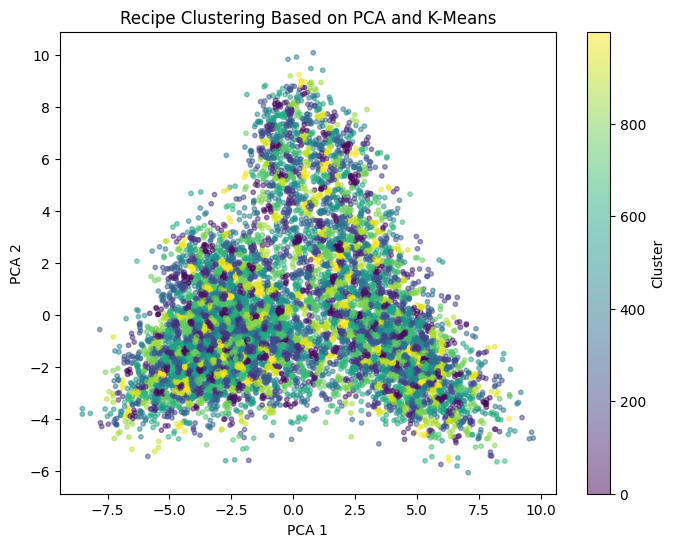

In [68]:
# Apply K-Means clustering to the PCA result
kmeans = KMeans(n_clusters=1000, random_state=42)  # Setting n_clusters to 9 based on your observation
df['cluster'] = kmeans.fit_predict(pca_result)

# Display the first 5 rows with cluster labels
print("\nClustered Recipes (first 20 rows):")
print(df[['title', 'cluster']].head(20))

# Visualize the clusters in the PCA space
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df['cluster'], cmap='viridis', alpha=0.5, s=10)
plt.title('Recipe Clustering Based on PCA and K-Means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [69]:
# Filter and display all recipes from a particular cluster (e.g., cluster 0)
cluster_to_view = 661  # Change this to any cluster number you want to see
recipes_in_cluster = df[df['cluster'] == cluster_to_view]

# Print out all the recipes in the chosen cluster
print(f"\nAll Recipes in Cluster {cluster_to_view}:")
print(recipes_in_cluster[['title', 'cluster']])


All Recipes in Cluster 661:
                        title  cluster
13        Taco Salad Chip Dip      661
957         Loris'S Egg Salad      661
965           Best Ever Salad      661
1515           Macaroni Salad      661
3159        Middle Age Spread      661
5027                 Taco Dip      661
5698           Cucumber Salad      661
6184  Creamy Shrimp Appetizer      661
7083      Marinated Pea Salad      661
7901           Kismet Chicken      661
8086              Cheese Ball      661
8542           Stuffed Celery      661
9671              Pasta Salad      661


In [70]:
# Filter and display all recipes from a particular cluster (e.g., cluster 0)
cluster_to_view = 252  # Change this to any cluster number you want to see
recipes_in_cluster = df[df['cluster'] == cluster_to_view]

# Print out all the recipes in the chosen cluster
print(f"\nAll Recipes in Cluster {cluster_to_view}:")
print(recipes_in_cluster[['title', 'cluster']])


All Recipes in Cluster 252:
                                                title  cluster
69                            Moist Devil'S Food Cake      252
804                             Sour Cream Pound Cake      252
1407                           Bananas 'N' Cream Cake      252
2473                            Sour Cream Pound Cake      252
2856  Hershey'S Great American Chocolate Chip Cookies      252
5596                                Coconut Mist Cake      252
8719                             Silver And Gold Cake      252
